Import libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

Import dataset

In [8]:
df = pd.read_csv('infy_df.csv')
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794920,0.796680,0.791020,0.796680,-0.000436,204800.0
1,1996-01-02,0.794920,0.798830,0.793460,0.793460,-0.000435,204800.0
2,1996-01-03,0.798830,0.798830,0.798830,0.798830,-0.000437,102400.0
3,1996-01-04,0.791020,0.794920,0.791020,0.793550,-0.000435,307200.0
4,1996-01-05,0.784180,0.784180,0.784180,0.784180,-0.000429,51200.0
...,...,...,...,...,...,...,...
6300,2020-12-28,1238.449951,1248.000000,1236.000000,1240.300049,1240.300049,4607051.0
6301,2020-12-29,1235.000000,1254.449951,1235.000000,1250.300049,1250.300049,6878105.0
6302,2020-12-30,1253.000000,1253.300049,1238.150024,1246.800049,1246.800049,5194690.0
6303,2020-12-31,1243.000000,1258.400024,1239.000000,1255.800049,1255.800049,7430470.0


In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.79492,0.79668,0.79102,0.79668,-0.000436,204800.0
1,1996-01-02,0.79492,0.79883,0.79346,0.79346,-0.000435,204800.0
2,1996-01-03,0.79883,0.79883,0.79883,0.79883,-0.000437,102400.0
3,1996-01-04,0.79102,0.79492,0.79102,0.79355,-0.000435,307200.0
4,1996-01-05,0.78418,0.78418,0.78418,0.78418,-0.000429,51200.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6175 entries, 0 to 6304
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6175 non-null   object 
 1   Open       6175 non-null   float64
 2   High       6175 non-null   float64
 3   Low        6175 non-null   float64
 4   Close      6175 non-null   float64
 5   Adj Close  6175 non-null   float64
 6   Volume     6175 non-null   float64
dtypes: float64(6), object(1)
memory usage: 385.9+ KB


In [32]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6.175000e+03
mean,284.214542,287.710074,280.646182,284.173218,191.532802,1.584464e+07
std,244.364213,246.941411,241.904329,244.416816,247.506413,1.634486e+07
min,0.763180,0.765630,0.712890,0.763180,-0.007392,0.000000e+00
25%,70.226548,71.241799,68.411350,69.844902,3.803389,6.288047e+06
50%,232.488007,235.688004,228.455994,232.268997,70.577179,9.981328e+06
75%,459.375000,463.500000,454.637497,459.403503,326.698257,1.910883e+07
max,1257.900024,1265.500000,1255.800049,1260.449951,1260.449951,2.766150e+08


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(-1000.0, 0, '2016-12-14'),
  Text(0.0, 0, '1996-01-01'),
  Text(1000.0, 0, '2000-01-24'),
  Text(2000.0, 0, '2004-01-22'),
  Text(3000.0, 0, '2008-01-29'),
  Text(4000.0, 0, '2012-03-01'),
  Text(5000.0, 0, '2016-03-29'),
  Text(6000.0, 0, '2020-04-24'),
  Text(7000.0, 0, '')])

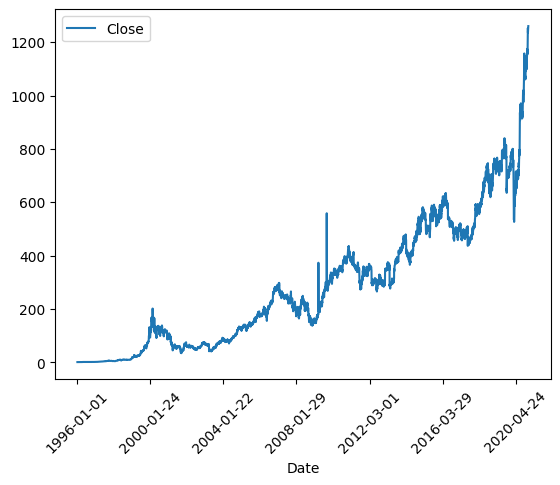

In [11]:
df.plot(x='Date',y='Close')
plt.xticks(rotation=45)

Create a RandomForestRegressor model

In [12]:
model = RandomForestRegressor()

Training the model

In [33]:
X = df[['Open','High','Low','Volume']]

In [34]:
y= df['Close']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
print('The model score is:',model.score(X_train,y_train))

The model score is: 0.999976266425714


Prediction on training data

In [19]:
y_pred = model.predict(X_train)


In [20]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

In [21]:
mean_absolute_error(y_pred,y_train)

0.6685109644118284

In [22]:
mean_squared_error(y_pred,y_train)

1.5503764239099251

In [23]:
r2_score(y_pred,y_train)

0.9999737098058316

Prediction on testing data

In [24]:
y_pred = model.predict(X_test)

In [26]:
print('The model score is:',model.score(X_test,y_test))

The model score is: 0.9998162335674103


In [27]:
mean_absolute_error(y_pred,y_test)

1.724267576825922

In [28]:
mean_squared_error(y_pred,y_test)

11.390904077613358

In [29]:
r2_score(y_pred,y_test)

0.9998163532170637

In [80]:
#Make the predictions
new_data = df[['Open','High','Low','Volume']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the last row to be:',prediction)
print('Actual value is:',df[['Close']].tail(1).values[0][0])

The model predicts the last row or day to be: [1248.695049]
Actual value is: 1260.449951


Plotting the observed and predicted data

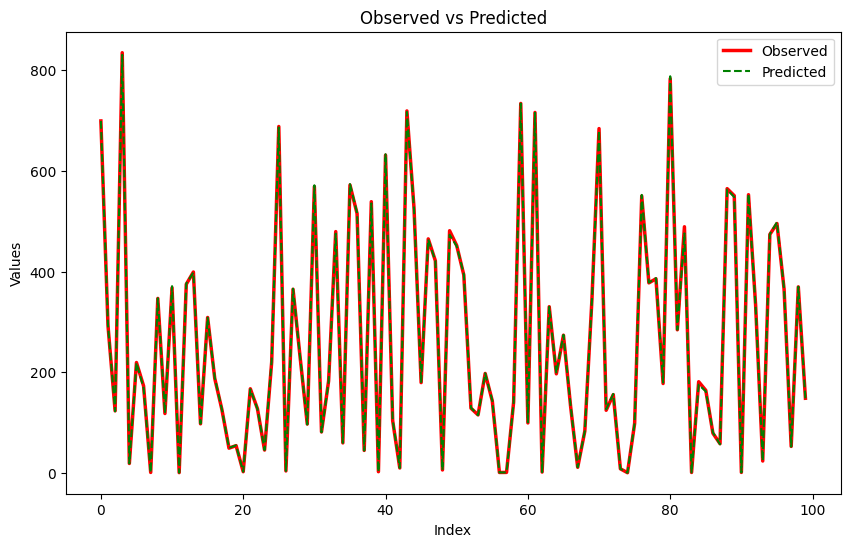

In [89]:

plt.rcParams['figure.figsize'] = (10, 6)
num_rows_to_plot = 100
x_ax = range(num_rows_to_plot)

y_test_subset = y_test[:num_rows_to_plot]
y_pred_subset = y_pred[:num_rows_to_plot]

plt.plot(x_ax, y_test_subset, label='Observed', color='red', linestyle='-',linewidth=2.5)
plt.plot(x_ax, y_pred_subset, label='Predicted', color='green', linestyle='--')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Observed vs Predicted')
plt.legend()

plt.show()
